# Tarea 3

<div class="alert alert-block alert-success">
<b>1:</b> Descaarga de datos de ERA5 (https://cds.climate.copernicus.eu/cdsapp#!/home)
</div>

In [1]:
import cdsapi
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from pylab import* # matrices de graficas!!!
import xarray as xr
from netCDF4 import Dataset
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature
import os

In [2]:
session = requests.Session()

# Metano

In [ ]:
import cdsapi

c = cdsapi.Client(url="https://cds.climate.copernicus.eu/api/v2", key= "145517:8fd5a74e-c05f-4b27-808f-070f9b655f06")

c.retrieve(
    'satellite-methane',
    {
        'processing_level': 'level_2',
        'variable': 'ch4',
        'sensor_and_algorithm': 'iasi_metop_a_nlis',
        'year': '2020',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'version': '9.1',
        'format': 'zip',
    },
    'download.zip')

# Temperatura a 2m de altura

In [ ]:
import cdsapi

c = cdsapi.Client(url="https://cds.climate.copernicus.eu/api/v2", key= "145517:8fd5a74e-c05f-4b27-808f-070f9b655f06")

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': '2m_temperature',
        'year': '2021',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            12, -79, -4,
            -66,
        ],
    },
    'download.nc')

C:\Users\valiz\anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2022-07-14 12:16:32,167 INFO Welcome to the CDS
2022-07-14 12:16:32,167 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
C:\Users\valiz\anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2022-07-14 12:16:32,365 INFO Request is queued
C:\Users\valiz\anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is b

Result(content_length=60392980,content_type=application/x-netcdf,location=https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data3/adaptor.mars.internal-1657819450.2577825-870-14-39d17914-f4cd-4c13-ba3b-4293b80881e5.nc)

# Llamar datos de temperatura

In [ ]:
ds = xr.open_dataset("download.nc")

C:\Users\valiz\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: No se puede encontrar el módulo especificado.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [ ]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 53, latitude: 65, time: 8760)
Coordinates:
  * longitude  (longitude) float32 -79.0 -78.75 -78.5 ... -66.5 -66.25 -66.0
  * latitude   (latitude) float32 12.0 11.75 11.5 11.25 ... -3.5 -3.75 -4.0
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 17:24:43 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

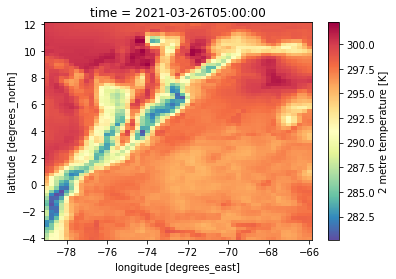

In [ ]:
ds.t2m[2021,:,:].plot(cmap="Spectral_r")

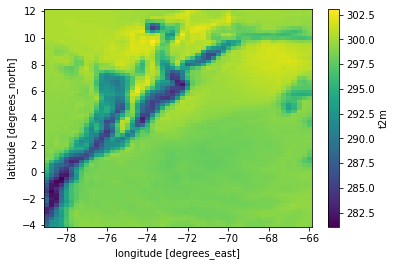

In [ ]:
ds.t2m.mean(dim=["time"]).plot()

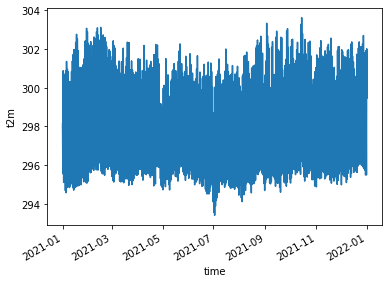

In [ ]:
ds.t2m.mean(dim=["latitude","longitude"]).plot()

In [ ]:
dia_espe = ds.sel(time='2021-07-06')

(array([  167.,   570.,  1617.,  2605.,  3924., 26026., 31456., 14729.,
         1513.,    73.]),
 array([274.34036, 278.13068, 281.92096, 285.71127, 289.5016 , 293.29187,
        297.08218, 300.8725 , 304.6628 , 308.4531 , 312.2434 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

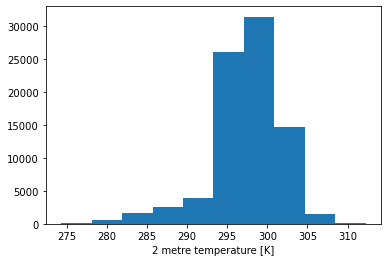

In [ ]:
dia_espe.t2m.plot()

In [ ]:
topo = 'D:\\DOCS\\SERGIO_ARBOLEDA\\Incendios\\CURSO\\GMRTv3_6_20190709topo.grd'
vart = Dataset(topo, mode='r')
xtopo = np.arange(vart.variables['x_range'][0], vart.variables['x_range'][1]+0.5*vart.variables['spacing'][0],vart.variables['spacing'][0])
ytopo = np.arange(vart.variables['y_range'][0], vart.variables['y_range'][1]+0.5*vart.variables['spacing'][1],vart.variables['spacing'][1])

xt0, yt0 = np.meshgrid(xtopo,ytopo)
z = vart.variables['z'][:]
z = np.reshape(z,xt0.shape)[::-1,:]

C:\Users\valiz\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linestyle'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


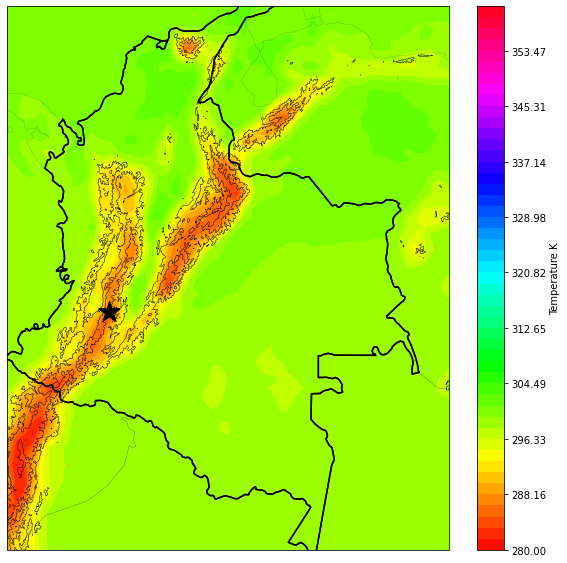

In [ ]:
sta = '2021-01-01'
end = '2021-12-31'

d1520 = ds.sel(time=slice(sta,end))
tme = d1520.t2m.mean(dim='time')

fig = plt.figure(figsize=(10,10))
gs = GridSpec(1,1)
ax = plt.subplot(gs[0], projection= ccrs.PlateCarree())
curvas = plt.contour(xt0, yt0, z, levels = np.arange(1500,3001,1500),colors = 'black', linewidths = 0.5, linestyle='--')
im = plt.contourf(ds.variables['longitude'], ds.variables['latitude'], tme, transform= ccrs.PlateCarree(), 
            levels = np.linspace(280,360,50), cmap='hsv', extent='both')
bar = plt.colorbar(im)
bar.set_label("Temperature K")

shape_feature = ShapelyFeature(shpreader.Reader('D:\\DOCS\\SERGIO_ARBOLEDA\\Incendios\\CURSO\\World_Countries\World_Countries\World_Countries.shp').geometries(),ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.1)
ax.add_feature(shape_feature)

shape_feature = ShapelyFeature(shpreader.Reader('D:\\DOCS\\SERGIO_ARBOLEDA\\Incendios\\CURSO\\World_Countries\World_Countries\COL_no_dptos.shp').geometries(),ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1.5)
ax.add_feature(shape_feature)

ax.add_feature(shape_feature)
plt.scatter(-76,3, marker="*",s=500, color="k")